In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('data/styles.csv', error_bad_lines=False)

In [3]:
bw_img = np.load('data/bw_array.npy')

In [4]:
all_img = np.load('data/image_array.npy')

In [4]:
from subset_df import wearable_subset, top2_subset

In [5]:
df1, bw_img1 = wearable_subset(df, bw_img)

In [6]:
df2, bw_img2 = top2_subset(df, bw_img)

In [7]:
df_cut = df1[0:3000].copy()
bw_img_cut = bw_img1[0:3000].copy()

In [8]:
df_cut2 = df2[0:3000].copy()
bw_img_cut2 = bw_img2[0:3000].copy()

In [9]:
from sklearn.cluster import AgglomerativeClustering

In [10]:
three_clust = AgglomerativeClustering(n_clusters=3).fit(bw_img_cut)

In [11]:
df_cut.loc[:,'Cluster_Number'] = three_clust.labels_

In [12]:
df_cut.loc[:, 'Category_Number'] = df_cut['masterCategory'].apply(lambda x: 0 if x =='Apparel' else (1 if x=='Accessories' else 2))

In [6]:
# clust_by_cat = []
# for x in range(3):
#     w = df_cut[df_cut['Category_Number']==x].groupby('Cluster_Number').count()['masterCategory'].values
#     clust_by_cat.append(w)
clust_by_cat = np.load('agglo_clust3.npy')

In [7]:
pivot_df = pd.DataFrame(clust_by_cat, index=['Apparel','Accessories', 'Footwear'], columns=['Cluster 1', 'Cluster 2', 'Cluster 3'])

In [8]:
pivot_df = pd.DataFrame(clust_by_cat, index=['Apparel','Accessories', 'Footwear'], columns=['Cluster 1', 'Cluster 2', 'Cluster 3'])
piv_df = pivot_df.transpose()
piv_df

,Apparel,Accessories,Footwear
Cluster 1,4400,1464,69
Cluster 2,420,1012,1985
Cluster 3,11,58,19


In [9]:
pct_df = (100 * pivot_df / pivot_df.sum(axis=0)).round(2).transpose()
pct_df

,Apparel,Accessories,Footwear
Cluster 1,74.16,24.68,1.16
Cluster 2,12.29,29.62,58.09
Cluster 3,12.50,65.91,21.59


In [34]:
x_pos = pd.DataFrame([[2200, 5000, 5900],[80, 800, 2200],[80, 480, 880 ]])

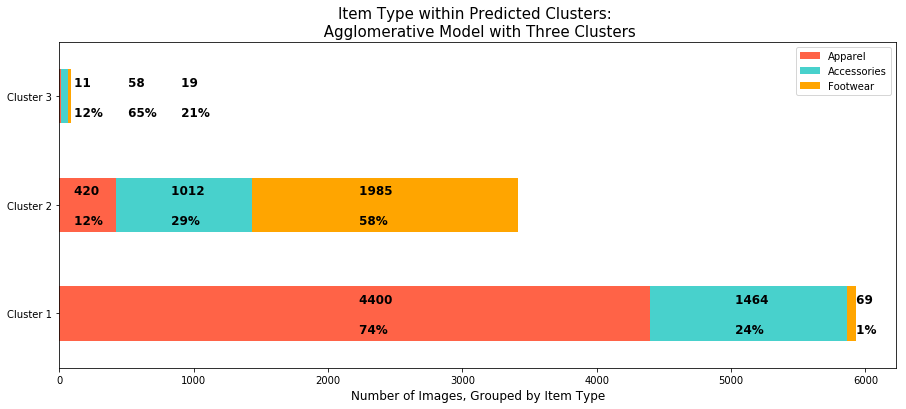

In [47]:
ax = piv_df.loc[ ['Cluster 1','Cluster 2', 'Cluster 3'], :].plot.barh(stacked=True, figsize=(15,6), color=['#FF6347','#48D1CC','#FFA500'])
for row in range(3):
    for col in range(3):
        ax.text(x=x_pos.iloc[row,col], y=row-.18 , s=' {0} \n \n {1}%'.format(piv_df.iloc[row,col],int(pct_df.iloc[row,col])), fontsize=12, fontweight='bold')
ax.set_title('Item Type within Predicted Clusters: \n Agglomerative Model with Three Clusters', fontsize=15);
ax.set_xlabel('Number of Images, Grouped by Item Type', fontsize=12);


In [19]:
two_clust = AgglomerativeClustering(n_clusters=2).fit(bw_img_cut2)

In [20]:
df_cut2.loc[:,'Cluster_Number'] = two_clust.labels_
df_cut2.loc[:, 'Category_Number'] = df_cut2['masterCategory'].apply(lambda x: 0 if x =='Apparel' else 1)

In [21]:
clust_by_cat2 = []
for x in range(3):
    w = df_cut2[df_cut2['Category_Number']==x].groupby('Cluster_Number').count()['masterCategory'].values
    clust_by_cat2.append(w)
clust_by_cat2

[array([928, 964]), array([517, 591]), array([], dtype=int64)]

In [4]:
pwd

'/Users/Kelly/galvanize/week8'

In [5]:
np.load('agglo_clust3.npy')

array([[4400,  420,   11],
       [1464, 1012,   58],
       [  69, 1985,   19]])

In [51]:
clust_by_cat2 = np.load('agglo_clust2.npy')

In [53]:
pivot_df2 = pd.DataFrame(clust_by_cat2, index=['Apparel','Accessories'], columns=['Cluster 1', 'Cluster 2'])
piv_df2 = pivot_df2.transpose()
piv_df2

,Apparel,Accessories
Cluster 1,3828,706
Cluster 2,1003,1828


In [54]:
pct_df2 = (100 * pivot_df2 / pivot_df2.sum(axis=0)).round(2).transpose()
pct_df2

,Apparel,Accessories
Cluster 1,84.43,15.57
Cluster 2,35.43,64.57


In [68]:
x_pos2 = pd.DataFrame([[2000, 4100],[500, 1900]])

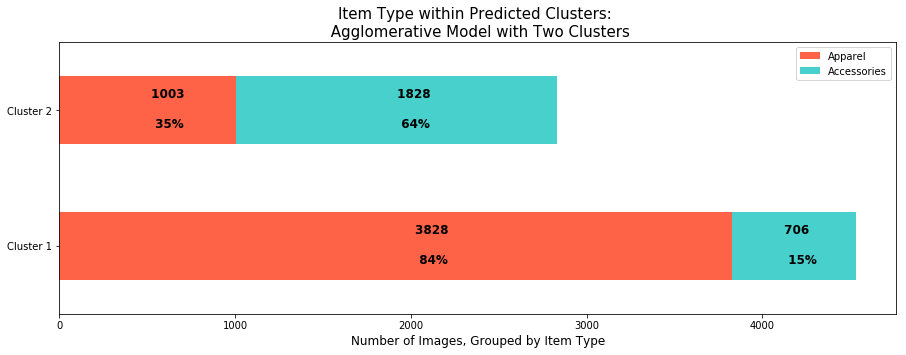

In [69]:
ax = piv_df2.loc[ ['Cluster 1','Cluster 2'], :].plot.barh(stacked=True, figsize=(15,5), color=['#FF6347','#48D1CC'])
for row in range(2):
    for col in range(2):
        ax.text(x=x_pos2.iloc[row,col], y=row-.13 , s=' {0} \n \n  {1}%'.format(piv_df2.iloc[row,col],int(pct_df2.iloc[row,col])), fontsize=12, fontweight='bold')
ax.set_title('Item Type within Predicted Clusters: \n Agglomerative Model with Two Clusters', fontsize=15);
ax.set_xlabel('Number of Images, Grouped by Item Type', fontsize=12);